# Assignment 1

# README

## Dependencies

- numpy
- matplotlib
- pandas
- openpyxl
- The assignments data files (must be in the same folder as this notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

for f in ["x_train.npy", "y_train.npy", "x_test.npy", "y_test.npy", "Housing_data_regression.xlsx"]:
    print(f"Found {f}...{"✅" if os.path.isfile(f) else "❌"}")

Found x_train.npy...✅
Found y_train.npy...✅
Found x_test.npy...✅
Found y_test.npy...✅
Found Housing_data_regression.xlsx...✅


# Question 1

## Dataset Visualization

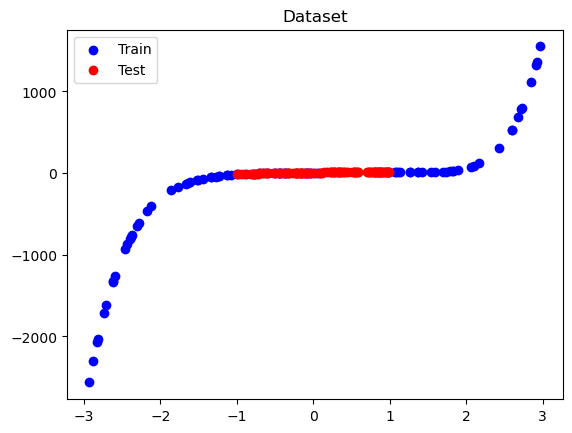

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.title("Dataset")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.legend(["Train", "Test"])
plt.show()

### Linear Regression Implementation

In [3]:
def linear_regression(X, Y, alpha, num_iterations, basis=None):
    assert len(X.shape) in [1, 2], "X must be at most 2D"
    assert len(Y.shape) == 1 or (len(Y.shape) == 2 and Y.shape[1] == 1), "Y must be 1D"

    # Convert X and Y from (n,) to (n,1)
    if len(X.shape) == 1:
        X = X.reshape((len(X), 1))
    Y = Y.reshape((len(Y), 1))

    # Add 1 as first column of X for $\theta_0$
    X = np.insert(X, 0, 1, axis=1)
    
    # Random initialization
    theta = np.random.rand(X.shape[1])

    # Apply basis functions (if applicable)
    if basis:
        # Insert identity function for theta[0]
        basis = [lambda x: x] + basis
        assert len(basis) == X.shape[1], "Must have the same number of basis functions as columns + 1"
        X = np.array([b(x) for x, b in zip(X.T, basis)]).T

    for i in range(num_iterations):
        # Compute derivative loss w.r.t theta
        d_theta = alpha * ((Y.T - (X @ theta.T)) @ X) / X.shape[0]

        # Log progress
        if i % (num_iterations // 10) == 0:
            loss = np.sum((Y.T - (X @ theta.T)) ** 2)
            print(f"Iteration {i} | Loss: {loss:.4f} | Change: {np.linalg.norm(d_theta):.6f}")

        # Exit early upon convergence
        if np.linalg.norm(d_theta) < 1e-6:
            print(f"Stopped early after {i + 1} iterations")
            break

        theta += d_theta[0]
    return theta

### x^3 Basis

Iteration 0 | Loss: 45031138.4371 | Change: 0.639039
Iteration 10000 | Loss: 5747403.9780 | Change: 0.003925
Iteration 20000 | Loss: 5613955.0231 | Change: 0.001448
Iteration 30000 | Loss: 5595791.0982 | Change: 0.000534
Iteration 40000 | Loss: 5593318.7808 | Change: 0.000197
Iteration 50000 | Loss: 5592982.2702 | Change: 0.000073
Iteration 60000 | Loss: 5592936.4673 | Change: 0.000027
Iteration 70000 | Loss: 5592930.2330 | Change: 0.000010
Iteration 80000 | Loss: 5592929.3844 | Change: 0.000004
Iteration 90000 | Loss: 5592929.2689 | Change: 0.000001
Stopped early after 92989 iterations
----------------------------------------------------------------------------------------------------
Theta = [-106.90338016   59.56422351]
Total loss (train): 242996.38560980596
Total loss (test): 8451294.184143135
Visualization:


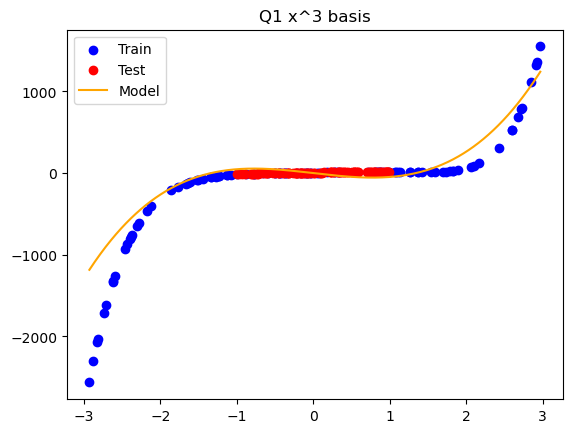

In [4]:
basis = [lambda x: x ** 3]
theta = linear_regression(x_train, y_train, 1e-4, 100_000, basis)
print("-"*100)
print(f"Theta = {theta}")
model = lambda x: sum(t * b(x) for t, b in zip(theta, [lambda x: x] + basis))
print(f"Total loss (train): {sum((y - model(x)) ** 2 for x, y in zip(x_test, y_test))}")
print(f"Total loss (test): {sum((y - model(x)) ** 2 for x, y in zip(x_train, y_train))}")

space = np.linspace(min(list(x_train) + list(x_test)), max(list(x_train) + list(x_test)), 1000)
prediction = model(space)

print("Visualization:")
plt.title("Q1 x^3 basis")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.plot(space, prediction, color="orange")
plt.legend(["Train", "Test", "Model"])
plt.show()

del basis, theta, model, space, prediction

### x^7 Basis

Iteration 0 | Loss: 11094220.5050 | Change: 0.014457
Iteration 100000 | Loss: 4945190.7039 | Change: 0.000012
Iteration 200000 | Loss: 4914663.2670 | Change: 0.000012
Iteration 300000 | Loss: 4884739.9576 | Change: 0.000012
Iteration 400000 | Loss: 4855408.8202 | Change: 0.000012
Iteration 500000 | Loss: 4826658.1361 | Change: 0.000012
Iteration 600000 | Loss: 4798476.4183 | Change: 0.000012
Iteration 700000 | Loss: 4770852.4070 | Change: 0.000012
Iteration 800000 | Loss: 4743775.0655 | Change: 0.000012
Iteration 900000 | Loss: 4717233.5753 | Change: 0.000011
----------------------------------------------------------------------------------------------------
Theta = [-10.95824926   1.08570786]
Total loss (train): 21368.378349882903
Total loss (test): 5098817.920486704
Visualization:


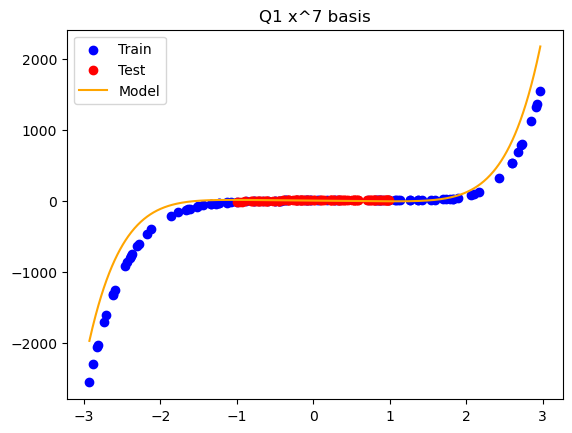

In [5]:
basis = [lambda x: x ** 7]
theta = linear_regression(x_train, y_train, 1e-7, 1_000_000, basis)
print("-"*100)
print(f"Theta = {theta}")
model = lambda x: sum(t * b(x) for t, b in zip(theta, [lambda x: x] + basis))
print(f"Total loss (train): {sum((y - model(x)) ** 2 for x, y in zip(x_test, y_test))}")
print(f"Total loss (test): {sum((y - model(x)) ** 2 for x, y in zip(x_train, y_train))}")

space = np.linspace(min(list(x_train) + list(x_test)), max(list(x_train) + list(x_test)), 1000)
prediction = model(space)

print("Visualization:")
plt.title("Q1 x^7 basis")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.plot(space, prediction, color="orange")
plt.legend(["Train", "Test", "Model"])
plt.show()

del basis, theta, model, space, prediction

## Report

The linear regression was implemented in the `linear_regression` function above.
It uses the gradient descent algorithm (and thus accepts the learning rate $\alpha$ and the maximum iterations) with least squares loss and optional basis functions. It also will exit early if it detects minimal change in the parameters.
Initally, a basis function of $b(x)=x^3$ was chosen due to the dataset's visual shape.
But, increasing the exponent to $7$ allowed the output to better preserve the flat shape of the dataset around $x=0$.
This is reflected in the reduced loss in both the training and test sets (see text output above the plots).
However, $\alpha$ had to be decreased for the model with the $x^7$ basis to avoid overflowing computations (this also required an increase in maximum iterations to ensure convergence).

# Question 2

In [6]:
q2_stats = {}

## All Columns

In [7]:
df = pd.read_excel("Housing_data_regression.xlsx")
x_df = df.loc[:, df.columns != "Price"]
X = x_df.to_numpy()
Y = df[["Price"]].to_numpy()

theta = linear_regression(X, Y, 5e-4, 1_000_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))

print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["all"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

arguments_by_weight = sorted(zip(list(x_df.columns), theta[1:]), key=lambda t: np.abs(t[1]), reverse=True)
print("Parameters by weight (most to least important):")
for name, val in arguments_by_weight:
    print(f"\t{name:<20}{val:.4f}")

del theta, model, loss

Iteration 0 | Loss: 11252571071486.1797 | Change: 13095.160595
Iteration 100000 | Loss: 102192679678.1790 | Change: 0.587624
Iteration 200000 | Loss: 100853845919.1572 | Change: 0.296553
Iteration 300000 | Loss: 100379973893.4153 | Change: 0.195572
Iteration 400000 | Loss: 100169384979.6855 | Change: 0.131142
Iteration 500000 | Loss: 100074559529.7468 | Change: 0.088040
Iteration 600000 | Loss: 100031815354.4085 | Change: 0.059113
Iteration 700000 | Loss: 100012544142.0142 | Change: 0.039693
Iteration 800000 | Loss: 100003855281.5843 | Change: 0.026653
Iteration 900000 | Loss: 99999937654.0468 | Change: 0.017897
----------------------------------------------------------------------------------------------------
Theta = [-219715.37768165     732.03271286  207093.01385186    9463.91341533
  231913.96434468   46700.9223044   109917.55453078 -144153.36607721
   -2039.32271659]
Total loss: [9.99981713e+10]
Average loss: [4.99990856e+09]
Parameters by weight (most to least important):
	Livin

## Most Important Only

In [8]:
X = x_df[[arguments_by_weight[0][0]]].to_numpy()

theta = linear_regression(X, Y, 0.0001, 100_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))
print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["only_important"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

del theta, model, loss

Iteration 0 | Loss: 11253781770288.6973 | Change: 137.029146
Iteration 10000 | Loss: 384840034035.8899 | Change: 5.056415
Iteration 20000 | Loss: 348809678320.0229 | Change: 2.383950
Iteration 30000 | Loss: 328455533622.5867 | Change: 2.132529
Iteration 40000 | Loss: 312124281586.1721 | Change: 1.910688
Iteration 50000 | Loss: 299014044614.6393 | Change: 1.711928
Iteration 60000 | Loss: 288489534783.8572 | Change: 1.533844
Iteration 70000 | Loss: 280040770089.1237 | Change: 1.374285
Iteration 80000 | Loss: 273258352093.9155 | Change: 1.231324
Iteration 90000 | Loss: 267813627862.1714 | Change: 1.103235
----------------------------------------------------------------------------------------------------
Theta = [ 49894.41497808 432020.11721257]
Total loss: [2.63442765e+11]
Average loss: [1.31721382e+10]


## Least Important Removed

In [9]:
X = x_df.loc[:, x_df.columns != arguments_by_weight[-1][0]].to_numpy()

theta = linear_regression(X, Y, 4e-5, 1_000_000)
print("-"*100)

print(f"Theta = {theta}")
model = lambda x: np.dot(theta, np.insert(x, 0, 1))
loss = sum((y - model(x)) ** 2 for x, y in zip(X, Y))
print(f"Total loss: {loss}")
print(f"Average loss: {loss / len(X)}")

q2_stats["no_unimportant"] = {
    "total_loss": loss,
    "avg_loss": loss / len(X)
}

del theta, model, loss

Iteration 0 | Loss: 11253173338475.2090 | Change: 1002.492682
Iteration 100000 | Loss: 222028404225.4980 | Change: 0.941166
Iteration 200000 | Loss: 160910266564.1594 | Change: 0.635677
Iteration 300000 | Loss: 132424656129.2393 | Change: 0.439870
Iteration 400000 | Loss: 118498047931.4097 | Change: 0.311614
Iteration 500000 | Loss: 111364743569.2426 | Change: 0.225844
Iteration 600000 | Loss: 107542279577.0020 | Change: 0.167354
Iteration 700000 | Loss: 105400857011.5712 | Change: 0.126805
Iteration 800000 | Loss: 104145181720.1344 | Change: 0.098366
Iteration 900000 | Loss: 103371767968.9897 | Change: 0.078301
----------------------------------------------------------------------------------------------------
Theta = [-108226.85519079  194495.66270507    6900.62060349  261979.29038224
   50678.93633062   87397.96714107 -128489.19811094   -2651.4535421 ]
Total loss: [1.02868759e+11]
Average loss: [5.14343795e+09]


## Analysis

### What is the average least squares error for the given data using your simple linear regression model?

In [10]:
print(f"Average least squares error: {q2_stats["all"]["avg_loss"].item():.3f}")

Average least squares error: 4999908563.431


### Which factor has the most effect on the final value? How do you know this? Can you use only this feature to predict the price?

The most important factor can be determining by looking for the column whose associated $\theta$ value has the maximum absolute value.

The most important factor is printed below:

In [11]:
print(f"Most important column: {arguments_by_weight[0][0]} (theta value = {arguments_by_weight[0][1].item():.3f})")

Most important column: Living area (theta value = 231913.964)


### Which factor has the least effect on the final value? How do you know this? What effect does removing this feature have on the performance?

The least important factor can be determined by looking for the column whose associated $\theta$ value has the minimum absolute value

The lest important factor is printed below:

In [12]:
print(f"Least important column: {arguments_by_weight[-1][0]} (theta value = {arguments_by_weight[-1][1].item():.3f})")

Least important column: House ID (theta value = 732.033)
